In [3]:
%reload_ext autoreload
%autoreload 2
import sys
from dotenv import load_dotenv
import os
load_dotenv()

ROOT = os.getenv("ROOT")
sys.path.append(ROOT)
assert ROOT is not None, "Please create a .env file and specify your ROOT path."
from src.data_loader import load_reviews
from src.processing import reviews_processing

In [4]:
df = load_reviews(category="All_beauty", frac=0.01)
df = reviews_processing(df=df, clean_text=False)
sub = df.rename(columns={"rating": "label", "review_input": "text"})[["label", "text"]]

[16:57:10] | INFO  | loaded 7015 rows                                                             ]8;id=82722;file:///Users/lucanyckees/Desktop/my-repos/recommendation_system/src/data_loader.py\data_loader.py]8;;\:]8;id=996397;file:///Users/lucanyckees/Desktop/my-repos/recommendation_system/src/data_loader.py#18\18]8;;\

In [7]:
def map_rating_to_sentiment(rating: float, min_rating: float = 1.0, max_rating: float = 5.0) -> str:
    threshold_rating = (max_rating + min_rating) / 2
    if rating < threshold_rating:
        return "negative"
    elif rating > threshold_rating:
        return "positive"
    else:
        return "neutral"

df["sentiment"] = df["rating"].apply(lambda x: map_rating_to_sentiment(rating=x))

Matplotlib is building the font cache; this may take a moment.


<Axes: >

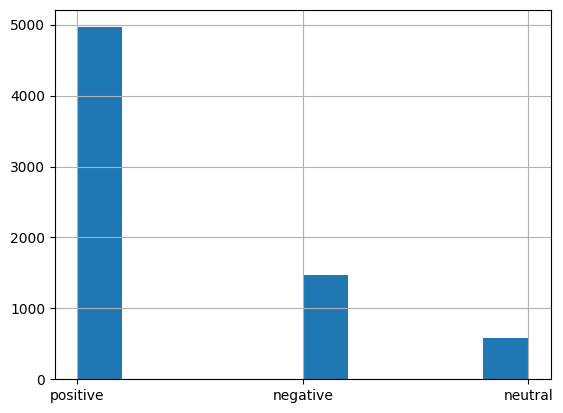

In [8]:
df["sentiment"].hist()